In [1]:
import pandas as pd
import numpy as np

C:\Users\minhq\AppData\Local\Temp\ipykernel_10596\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#read data
spam_df = pd.read_csv('../spam.csv', encoding='latin-1')

spam_df = spam_df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
spam_df['label'] = spam_df['label'].map({'ham': 0, 'spam': 1})

spam_df = spam_df.drop_duplicates(keep='first')

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


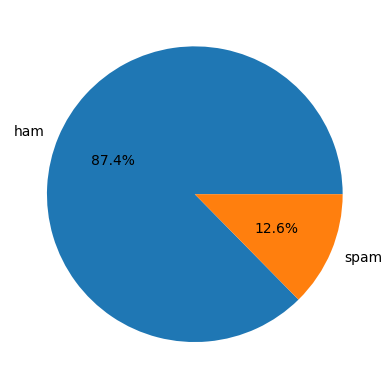

In [3]:
import matplotlib.pyplot as plt 

plt.pie(spam_df['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [5]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
    
    return " ".join(y)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\minhq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minhq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
spam_df['transform_message'] = spam_df['message'].apply(transform_text)

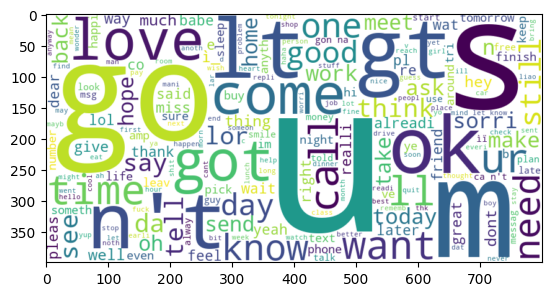

In [9]:
from wordcloud import WordCloud


#worcloud for spam messages
wc = WordCloud(width=800, height=400, max_words=200,background_color='white').generate(' '.join(spam_df[spam_df['label'] == 0]['transform_message']))
plt.imshow(wc, interpolation='bilinear')

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)

X = cv.fit_transform(spam_df['transform_message']).toarray()
y = spam_df['label'].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [14]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9835589941972921
0.9481481481481482
0.927536231884058
0.9377289377289377


In [ ]:
#save model

import pickle

pickle.dump(model, open('naive_bayes.pkl', 'wb'))
pickle.dump(cv, open('naive_bayes_cv.pkl', 'wb'))